# 13. Transformer가 나오기까지
---
13-1. 들어가며<br>
13-2. Attention의 역사 | `Attention` 개념을 학습합니다.<br>
13-3. Attention Is All You Need! | Transformer의 Attention 개념을 학습합니다.<br>
13-4. Positional Encoding | `Positional Encoding` 원리를 학습합니다.<br>
13-5. Multi-Head Attention | `Multi-Head Attention` 원리를 학습합니다.<br>
13-6. Position-wise Feed-Forward Networks | `Position-wise Feed-Forward Networks` 원리를 학습합니다.<br>
13-7. Additional Techniques | `Add` & `Norm`에 대해서 학습합니다.<br>
13-8. 트랜스포머, 그 후엔 | `BERT`와 `GPT`에 대해서 학습합니다.<br>
13-9. 마무리하며

## 13-1. 들어가며
---

### 학습 목표
- 트랜스포머 이전의 Attention 기법에 대해 간단하게 설명할 수 있다.
- 트랜스포머에 포함된 모듈들을 심층적으로 이해할 수 있다.
- 트랜스포머를 발전시키기 위해 적용된 여러 테크닉들을 설명할 수 있다.


# 13-2. Attention의 역사
---

- Attention 기법 : 
    - <u>입력 시퀀스의 **각 위치에 대해 가중치를 부여**</u>하여 <u>중요한 정보에 집중</u>하는 메커니즘입니다.
    - Attention은 트랜스포머(Transformer) 모델에서 주로 사용되며, 
    - Seq2seq 모델의 성능을 향상시키고 장기 의존성 문제를 완화하는 데에도 사용됩니다.
    

- **Sequence-to-sequence(Seq2seq)**는 신경망 언어 모델, 특히 기계번역에서 혁신적인 발전을 이룩해냈습니다. 기존의 단일 RNN은 번역에 적합한 구조가 아니었으나 두 개의 RNN을 결합한 Encoder-Decoder 구조를 만들어 문맥 전체를 반영한 번역이 가능하게 했죠.


- Bahdanau Attention: [Attn: Illustrated Attention](https://eda-ai-lab.tistory.com/157)
- Luong Attention: [[Attention] Luong Attention 개념 정리](https://hcnoh.github.io/2019-01-01-luong-attention)

## 13-3. Attention Is All You Need!
---

### [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf)

> We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.
>
>(우리는 RNN과 CNN을 완전히 배제하고 Attention 메커니즘에만 기반을 둔 새롭고 단순한 구조, Transformer를 제안합니다.)*

저자들은 문장에서 **연속성이라는 개념을 과감히 배제** 하였습니다. 대신 **Attention으로 각 단어들의 상관관계를 구하는 데 집중** 하였죠. 일전에 배우셨듯이 
- 문장을 모델링 한다는 것은: <u>주어진 단어를 보고 모르는 단어에 확률을 할당</u>하는 것입니다. 

 연속성이 배제된 채로 문장을 모델링 한다는 것은, 단순히 생각하면 입력으로 빨간 사과 노란 바나나가 들어가는 것과 노란 사과 빨간 바나나가 들어가는 것이 동일하게 취급되는 셈입니다.

RNN처럼 단어 입력을 순차적으로 처리하지도 않으면서 어떻게 문장을 정확히 처리해냈는지는 차근차근 이해해 보도록 하죠!

### transformer 구조 : 
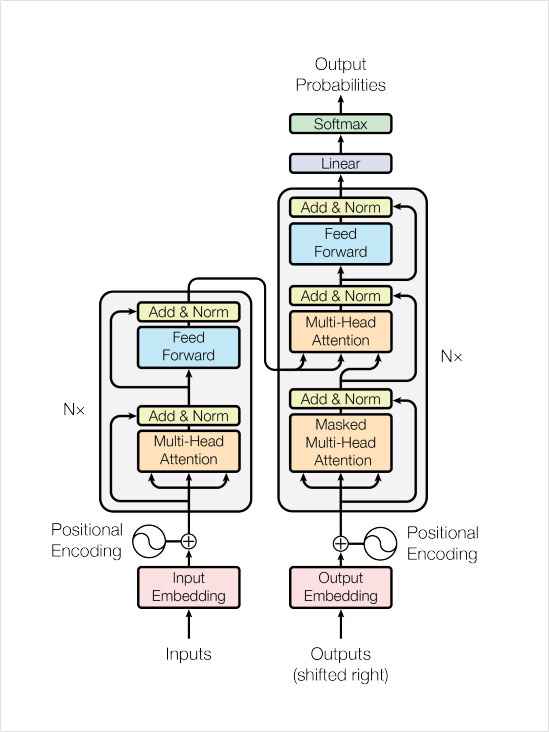

- 트랜스포머도 엄밀하게는 Seq2seq에서 제안된 `Encoder-Decoder` 구조를 사용합니다. 
- 대신 그 안에는 **LSTM 대신 다양한 모듈**들이 가득 차 있죠. 
- 그리고 이 멋진 **Encoder와 Decoder를 여러 개(논문에서는 6개) 쌓아올려 모델을 완성**합니다.

>가끔 헷갈려 하시는 분들이 있어 첨언하면, <br>
`Enc`-`Dec`-`Enc`-`Dec`-... 구조가 아닌 <br>
`Enc`-`Enc`-...-`Dec`-`Dec`-... 구조입니다!

먼저 문장의 연속성을 어떻게 배제할 수 있었는지, 모델의 최하단에 위치한 **Positional Encoding** 부터 차근차근 알아보도록 하겠습니다.

## 13-4. Positional Encoding
---
### `Positional Encoding`: 문장에 **연속성을 부여하는 새로운 방법**을 제시
[jeongstudy: positional encoding이란 무엇인가](https://skyjwoo.tistory.com/31)

- attention layer에 들어가기 전에 입력값으로 주어질 단어 vector 안에 positional encoding 정보, 즉, **단어의 위치 정보**를 포함시키고자 하는 것

#### 어떻게 위치정보를 전달할까? - 두 가지 방법, 한계
>1. 각 단어에 **0~1 사이의 값**을 더한다. 0을 첫 번째 단어로, 1을 마지막 단어로 한다.
>    - 한계 : 문장의 길이에 따라 더해지는 값이 가변적이다. 따라서 **단어 간의 거리(Delta)가 일정하지 않다.**
>
>
>2. 각 단어에 **선형적으로 증가하는 정수**를 더한다.
>    - 한계 : 단어 간의 거리(Delta)가 일정해지는 것은 좋지만 **범위가 무제한이기 때문에 값이 매우 커질 수 있고 모델이 일반화하기 어려워진다.**





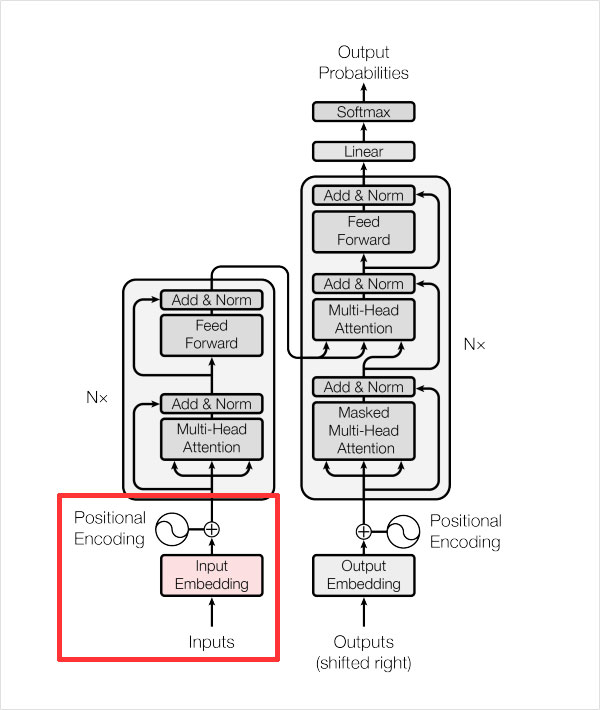

이전 스텝에서 문장의 연속성을 배제할 경우 `빨간 사과` `노란 바나나`와 `노란 사과` `빨간 바나나`를 같은 문장으로 간주하게 된다고 했죠? 
- Positional Encoding은 그런 불상사를 막기 위한 방법입니다. 
- 즉, 문장에 연속성을 부여하는 새로운 방법을 제시한 거죠.

- 쉽게 말하면 <u>입력이 들어온 순서대로 단어에 표기</u>를 하는 것과 같습니다. 예를 들면 `[빨간 + 1] [사과 + 2] [노란 + 3] [바나나 + 4]`과 같은 모양새로 말이죠. 하지만 그렇다고 단어 Embedding에 선형적으로 증가하는 값을 더해줬다간 후에 데이터의 분포가 엉망이 될 겁니다. 문제없이 Position을 나타낼 수 있는 방법엔 어떤 것들이 있을까요? 아래 웹페이지에서 자세한 내용을 확인해보세요!


>#### Positional Encoding이 만족해야 할 4가지 조건
>1. 각 Time-step마다 고유의 Encoding 값을 출력해야 한다.
>2. 서로 다른 Time-step이라도 같은 거리라면 차이가 일정해야 한다.
>3. 순서를 나타내는 값이 특정 범위 내에서 일반화가 가능해야 한다.
>4. 같은 위치라면 언제든 같은 값을 출력해야 한다.

### Positional Encoding 수식:
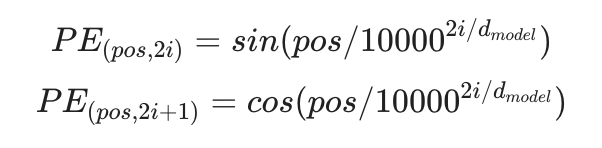

- `pos`는 단어가 위치한 Time-step을 의미하며 

- `i`는 Encoding 차원의 Index, 

- `d_model`은 모델의 Embedding 차원 수입니다. 

- 이를 `Sinusoid(사인파) Embedding`이라고 칭합니다. 이해를 돕기 위해 실제 구현을 확인해보죠.






In [2]:
# Positional Encoding 구현

import numpy as np

def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

    return sinusoid_table

pos = 7
d_model = 4
i = 0

print("Positional Encoding 값:\n", positional_encoding(pos, d_model))

print("")
print("if pos == 0, i == 0: ", np.sin(0 / np.power(10000, 2 * i / d_model)))
print("if pos == 1, i == 0: ", np.sin(1 / np.power(10000, 2 * i / d_model)))
print("if pos == 2, i == 0: ", np.sin(2 / np.power(10000, 2 * i / d_model)))
print("if pos == 3, i == 0: ", np.sin(3 / np.power(10000, 2 * i / d_model)))

print("")
print("if pos == 0, i == 1: ", np.cos(0 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 1, i == 1: ", np.cos(1 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 2, i == 1: ", np.cos(2 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 3, i == 1: ", np.cos(3 / np.power(10000, 2 * i + 1 / d_model)))

Positional Encoding 값:
 [[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.99500417  0.00999983  0.9999995 ]
 [ 0.90929743  0.98006658  0.01999867  0.999998  ]
 [ 0.14112001  0.95533649  0.0299955   0.9999955 ]
 [-0.7568025   0.92106099  0.03998933  0.999992  ]
 [-0.95892427  0.87758256  0.04997917  0.9999875 ]
 [-0.2794155   0.82533561  0.05996401  0.999982  ]]

if pos == 0, i == 0:  0.0
if pos == 1, i == 0:  0.8414709848078965
if pos == 2, i == 0:  0.9092974268256817
if pos == 3, i == 0:  0.1411200080598672

if pos == 0, i == 1:  1.0
if pos == 1, i == 1:  0.9950041652780258
if pos == 2, i == 1:  0.9800665778412416
if pos == 3, i == 1:  0.955336489125606


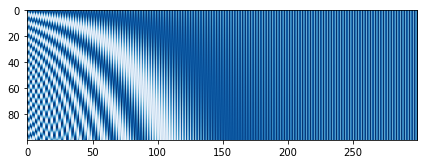

In [3]:
# 시각화: Position 값이 각 Time-step 별로 고유
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.imshow(positional_encoding(100, 300), cmap='Blues')
plt.show()

- 세로축이 `Time-step`에 해당하고 
- 가로축이 Word Embedding에 더해질 `Position 값`입니다. 

한눈에 봐도 각 스텝마다 고유한 값을 가지는 것을 알 수 있죠? 게다가 굉장히 아름답습니다!

저자들은 이뿐만 아니라 **Positional Embedding** 기법도 제안했습니다. <br>
수식적으로 계산한 Position 값이 아니라 **Position에 대한 정보를 담은 Embedding 레이어를 선언**하여 <u>위치에 대한 정보를 학습</u>할 수 있게 한 거죠. 

그림으로 표현하면 아래와 같습니다

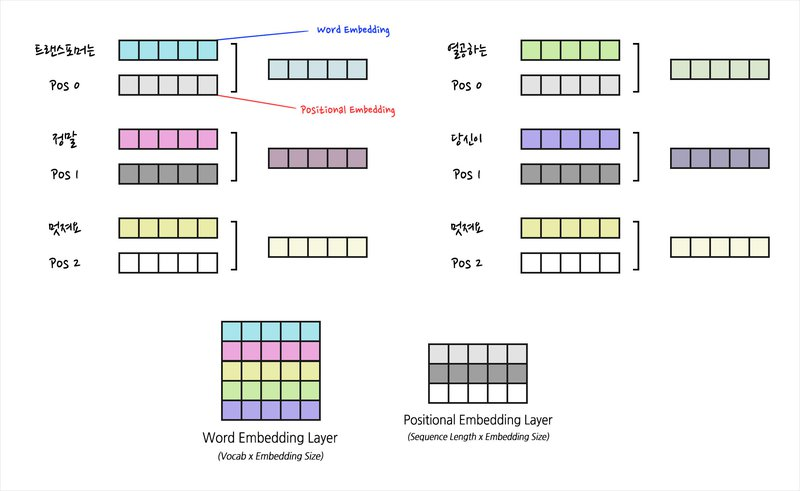

위와 같은 구조에서 `Positional Embedding`이 훈련 중 <u>값이 변한다고 하더라도</u> 그것은 **모든 문장에 대해 동일하게 적용**되기에 문제가 되지 않습니다. 오히려 `Sinusoid Embedding`보다 적합한 값이 학습될 것을 기대할 수도 있죠!

하지만 실제로는 두 방법 모두 거의 동일한(±0.1 BLEU) 결과를 보였으며, 저자들은 길이가 길어져도 부담이 없는 Sinusoid Embedding을 채택하였습니다. Positional Embedding은 문장의 길이만큼 Embedding Table의 크기가 커지니까요. Positional Embedding은 추후에 BERT라는 모델에 적용되어 멋진 성능을 보여줄 예정입니다!

## 13-5. Multi-Head Attention
---
이번 스텝에선 트랜스포머의 핵심으로 꼽히는 `Multi-Head Attention` 에 대해 알아보겠습니다. Positional Embedding이 된 문장으로부터 **Attention을 추출**하는 부분이죠!
<!--
![image.png](attachment:image.png)
-->
위 그림에서 보라색으로 표시된 `Masked Multi-Head Attention`은 Multi-Head Attention과 동일하지만 `인과 관계 마스킹(Causality Masking)` 이라는 과정이 하나 더 추가됩니다. 흐름에 따라 자연스럽게 후술하겠습니다!

Multi-Head Attention 모듈은 `Linear 레이어`와 `Scaled Dot-Product Attention 레이어`로 이루어집니다.

## 13-6. Position-wise Feed-Forward Networks


## 13-7. Additional Techniques


## 13-8. 트랜스포머, 그 후엔


## 13-9. 마무리하며